In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('./african_econ_crises.csv')

In [66]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,crisis
0,0,0,0,0,0,0.000000,0,0,0.0,0.000000,0,0,0,0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


<AxesSubplot: xlabel='cc3', ylabel='count'>

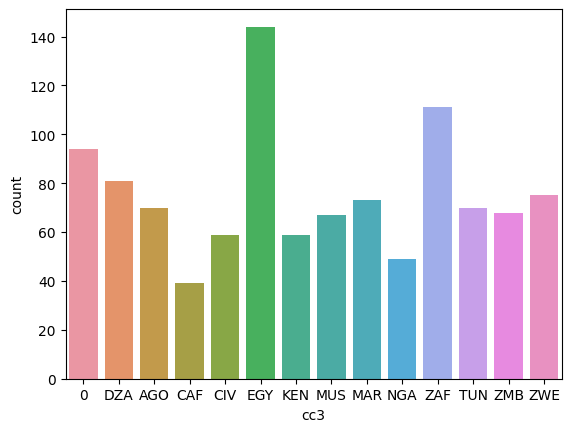

In [65]:
sns.countplot(x='cc3',data=df)


<AxesSubplot: xlabel='country', ylabel='count'>

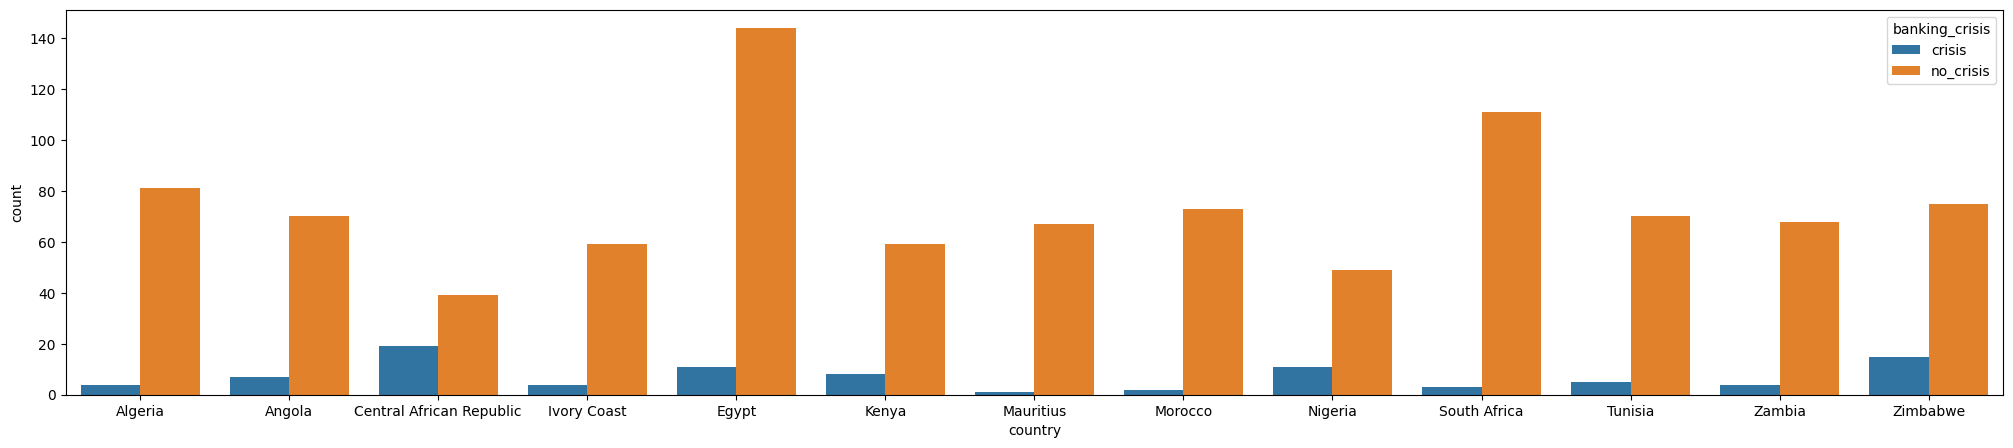

In [12]:
plt.figure(figsize=(25,5))

sns.countplot(x='country',data=df,hue='banking_crisis')

/var/folders/86/jnxc9qfj6sv26myyt8z8355h0000gn/T/ipykernel_6804/2798127851.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

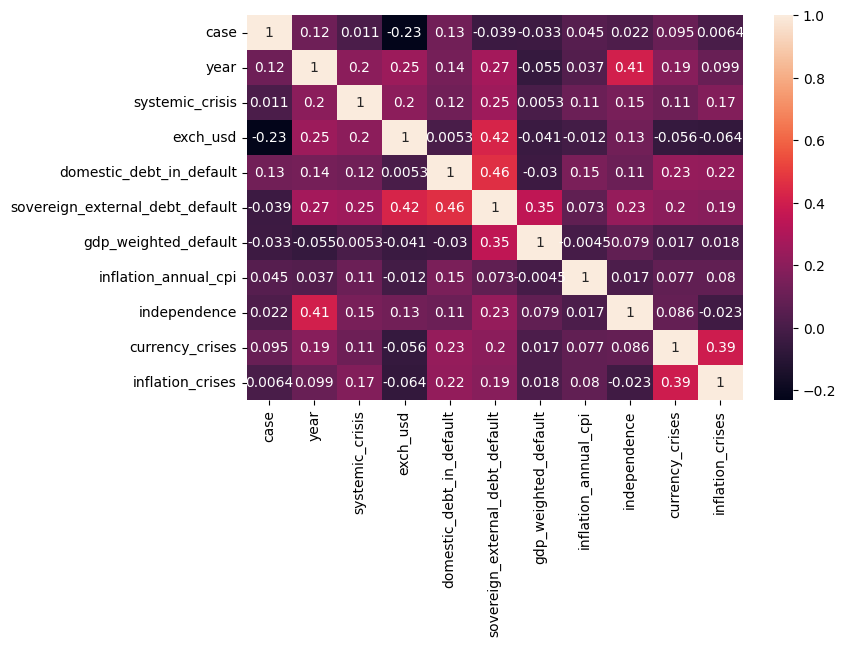

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)


In [49]:
df['crisis']=0
df['crisis'] = np.where(df['banking_crisis'] == 'no_crisis', 1, 0)

In [52]:
df['crisis'].value_counts()
df.drop(columns='banking_crisis',inplace=True)

/var/folders/86/jnxc9qfj6sv26myyt8z8355h0000gn/T/ipykernel_6804/3980826401.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['crisis'][:-1].sort_values().plot(kind='bar')


<AxesSubplot: >

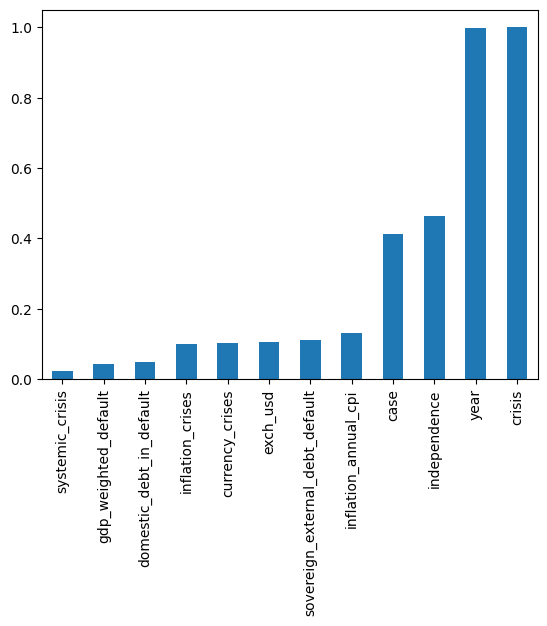

In [53]:
df.corr()['crisis'][:-1].sort_values().plot(kind='bar')

In [72]:
df.drop(columns=['cc3'],inplace=True)

In [78]:
df.drop(columns=['country'],inplace=True)

In [79]:
X = df.drop('crisis',axis=1).values
y = df['crisis'].values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [83]:
X_train.shape

(794, 11)

In [132]:
del model
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=11,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=11,activation='relu'))
model.add(Dropout(0.5))




model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [133]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
25/25 [==============================] - 0s 5ms/step - loss: 0.6866 - val_loss: 0.6593
Epoch 2/600
25/25 [==============================] - 0s 2ms/step - loss: 0.6221 - val_loss: 0.6016
Epoch 3/600
25/25 [==============================] - 0s 2ms/step - loss: 0.5561 - val_loss: 0.5299
Epoch 4/600
25/25 [==============================] - 0s 2ms/step - loss: 0.4936 - val_loss: 0.4567
Epoch 5/600
25/25 [==============================] - 0s 2ms/step - loss: 0.4266 - val_loss: 0.3864
Epoch 6/600
25/25 [==============================] - 0s 2ms/step - loss: 0.3607 - val_loss: 0.3265
Epoch 7/600
25/25 [==============================] - 0s 2ms/step - loss: 0.3334 - val_loss: 0.2827
Epoch 8/600
25/25 [==============================] - 0s 2ms/step - loss: 0.2872 - val_loss: 0.2574
Epoch 9/600
25/25 [==============================] - 0s 2ms/step - loss: 0.2590 - val_loss: 0.2425
Epoch 10/600
25/25 [==============================] - 0s 2ms/step - loss: 0.2660 - val_loss: 0.2317
Epoch 11/

<AxesSubplot: >

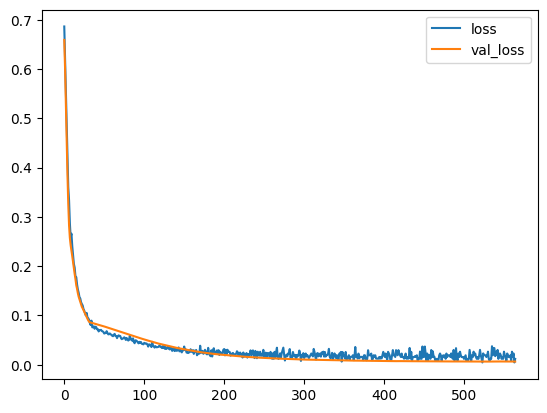

In [134]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()